Problem Statement: Study employee productivity in WFH vs WFO.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('WFH_WFO_dataset.csv', index_col= 'ID')

In [3]:
data.shape

(207, 18)

In [4]:
data.head()

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
ID,,,,,,,,,,,,,,,,,,
1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 1 to 207
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         207 non-null    object
 1   Age                          207 non-null    int64 
 2   Occupation                   207 non-null    object
 3   Gender                       207 non-null    object
 4   Same_ofiice_home_location    207 non-null    object
 5   kids                         207 non-null    object
 6   RM_save_money                207 non-null    object
 7   RM_quality_time              207 non-null    object
 8   RM_better_sleep              207 non-null    object
 9   calmer_stressed              207 non-null    object
 10  RM_professional_growth       207 non-null    int64 
 11  RM_lazy                      207 non-null    int64 
 12  RM_productive                207 non-null    int64 
 13  digital_connect_sufficient   207 no

In [6]:
data.describe()

,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,29.666667,3.086957,3.101449,3.623188,3.043478,3.521739,0.405797
std,8.506993,1.089301,1.255801,0.996617,1.247539,1.004002,0.492236
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,26.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,29.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [7]:
data.drop_duplicates(ignore_index=True)

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Louis,28,Manager,Male,Yes,No,No,No,No,STRESSED,2,4,3,No,2,5,Not sure,0
179,Nandini,32,Engineer,Female,Yes,Yes,Yes,Yes,Yes,CALMER,4,1,5,Yes,3,3,Not sure,1
180,Matt,52,Business,Male,Yes,Yes,Yes,Yes,Yes,CALMER,4,4,4,Yes,5,3,No,1
181,Rithik,22,Marketing,Male,Yes,No,Yes,Yes,No,STRESSED,4,4,4,No,4,3,Not sure,0


In [8]:
data['RM_productive'].value_counts()

4    69
3    66
5    45
2    24
1     3
Name: RM_productive, dtype: int64

In [9]:
data['Occupation'].unique()

array(['Tutor', 'HR', 'Engineer', 'Recruiter', 'Business', 'Marketing ',
       'Manager'], dtype=object)

In [10]:
data['Occupation'].value_counts()

Engineer      51
Tutor         30
Manager       29
HR            26
Business      26
Marketing     26
Recruiter     19
Name: Occupation, dtype: int64

In [11]:
data['Target'].value_counts()

0    123
1     84
Name: Target, dtype: int64

In [12]:
data['calmer_stressed'].value_counts()

STRESSED    126
CALMER       81
Name: calmer_stressed, dtype: int64

EDA

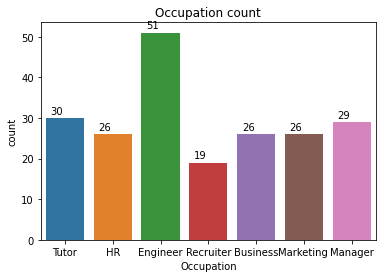

In [13]:
ax=sns.countplot(x='Occupation',data=data)
plt.title("Occupation count")
for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+1)) 

Text(0.5, 1.0, 'Male vs Female')

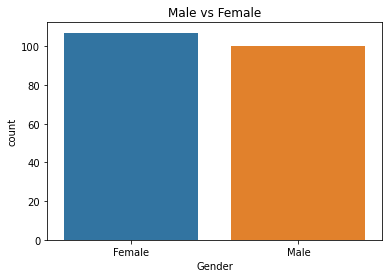

In [14]:
sns.countplot(x='Gender',data=data)
plt.title('Male vs Female')


Text(0.5, 1.0, 'Pie chart representing RM_productive')

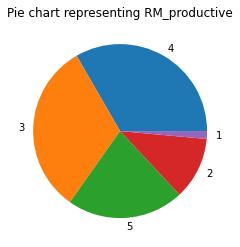

In [15]:
plt.pie(data['RM_productive'].value_counts().values,labels = data['RM_productive'].value_counts().index)
plt.title('Pie chart representing RM_productive')

Text(0.5, 1.0, 'RM_professional_growth')

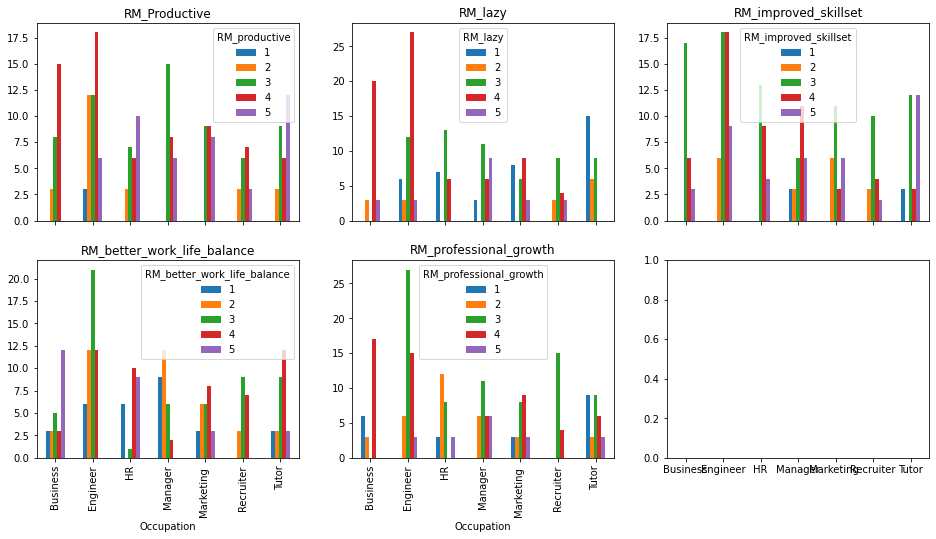

In [16]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
data.groupby('Occupation')['RM_productive'].value_counts().unstack().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('RM_Productive')

data.groupby('Occupation')['RM_lazy'].value_counts().unstack().plot(kind='bar',ax = axes[0,1])
axes[0,1].set_title('RM_lazy')

data.groupby('Occupation')['RM_improved_skillset'].value_counts().unstack().plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('RM_improved_skillset')

data.groupby('Occupation')['RM_better_work_life_balance'].value_counts().unstack().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('RM_better_work_life_balance')

data.groupby('Occupation')['RM_professional_growth'].value_counts().unstack().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('RM_professional_growth')

Text(0.5, 1.0, 'Violinplot for RM_productive with respect to occupation and gender')

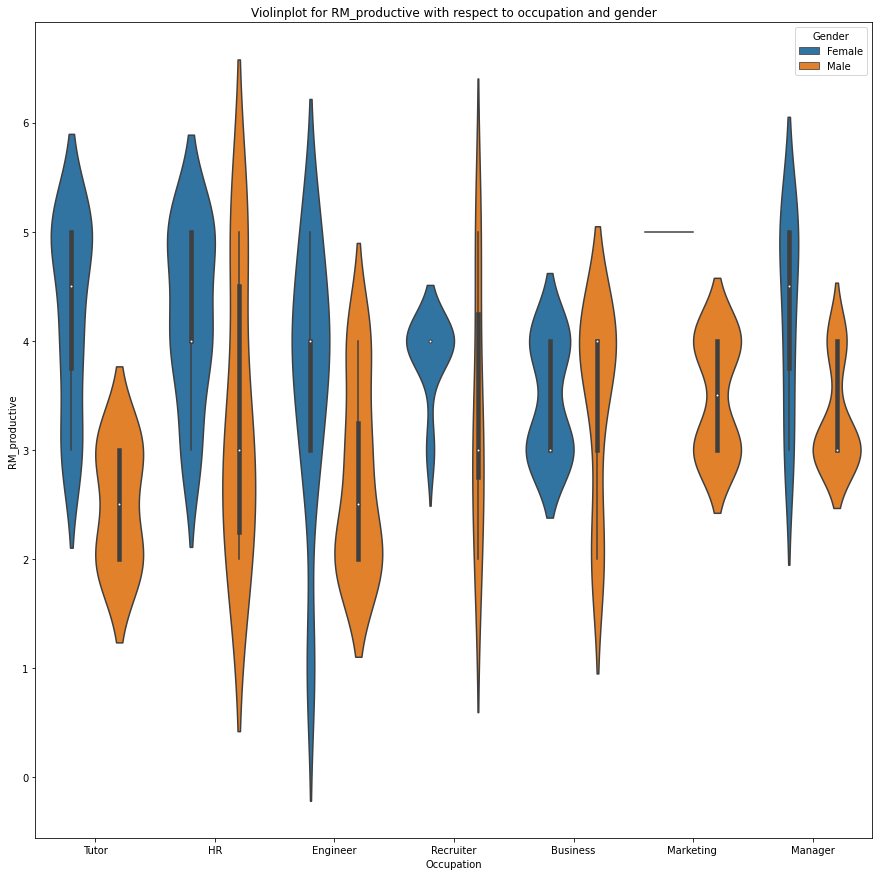

In [17]:
plt.figure(figsize = (15,15))
sns.violinplot(x = 'Occupation', y='RM_productive',hue = 'Gender',data = data).set_title('Violinplot for RM_productive with respect to occupation and gender')
#0 - Female

In [18]:
from statsmodels.graphics.mosaicplot import mosaic

Text(0.5, 1.0, 'RM_professional_growth')

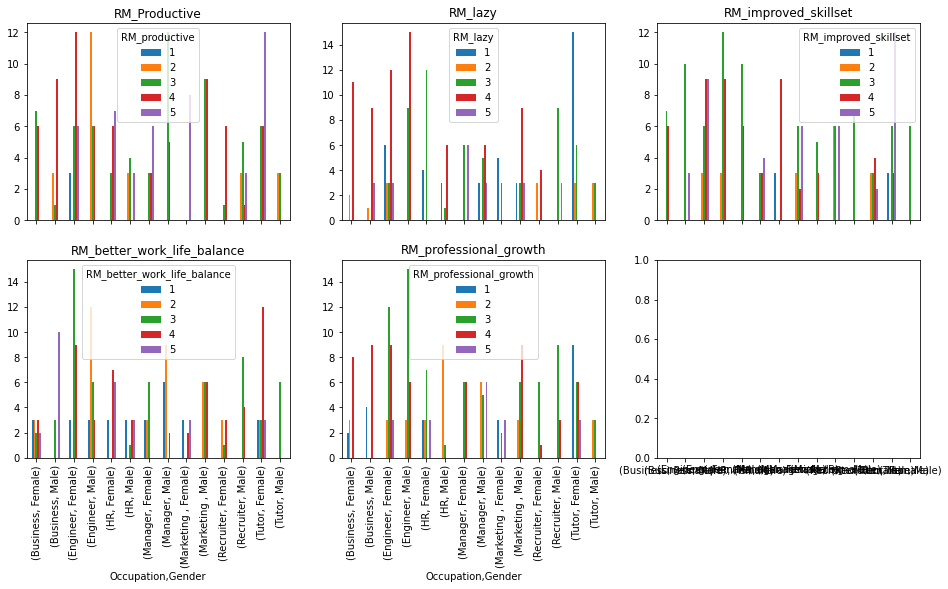

In [19]:
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
data.groupby(['Occupation','Gender'])['RM_productive'].value_counts().unstack().plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('RM_Productive')

data.groupby(['Occupation','Gender'])['RM_lazy'].value_counts().unstack().plot(kind='bar',ax = axes[0,1])
axes[0,1].set_title('RM_lazy')

data.groupby(['Occupation','Gender'])['RM_improved_skillset'].value_counts().unstack().plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('RM_improved_skillset')

data.groupby(['Occupation','Gender'])['RM_better_work_life_balance'].value_counts().unstack().plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('RM_better_work_life_balance')

data.groupby(['Occupation','Gender'])['RM_professional_growth'].value_counts().unstack().plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('RM_professional_growth')

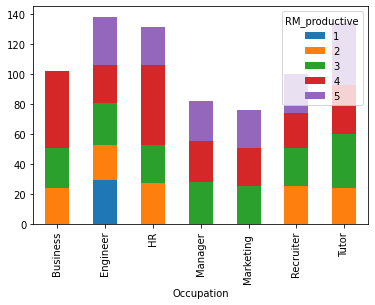

In [20]:
grouped_df = data.groupby(['Occupation','RM_productive'])['Age'].median().unstack()
grouped_df.plot(kind='bar', stacked=True)
plt.show()

In [21]:
import matplotlib.font_manager as fm

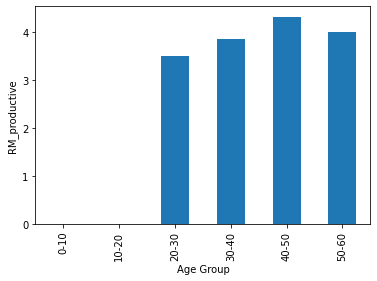

In [22]:
data['Age Group'] = pd.cut(data['Age'], bins=[0, 10, 20, 30, 40, 50, 60], labels=['0-10', '10-20','20-30','30-40','40-50','50-60'])

# Group by age group and compute the mean of other columns
grouped = data.groupby('Age Group').mean()

# Create a bar plot of mean income by age group
grouped['RM_productive'].plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('RM_productive')
plt.show()

In [23]:
grouped = data.groupby('Age Group')['RM_productive', 'RM_lazy'].mean()

# Print the resulting DataFrame
print(grouped)

           RM_productive   RM_lazy
Age Group                         
0-10                 NaN       NaN
10-20                NaN       NaN
20-30           3.487500  3.362500
30-40           3.857143  2.214286
40-50           4.315789  1.157895
50-60           4.000000  3.642857


C:\Users\SINCHANA\AppData\Local\Temp\ipykernel_13184\4085455077.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped = data.groupby('Age Group')['RM_productive', 'RM_lazy'].mean()


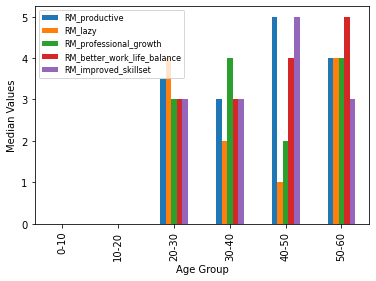

In [24]:
grouped = data.groupby('Age Group').median()
grouped = grouped[['RM_productive','RM_lazy','RM_professional_growth','RM_better_work_life_balance','RM_improved_skillset']]
grouped.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Median Values')
plt.legend(loc='upper left',prop=fm.FontProperties(size=8))
plt.show()

In [25]:
pd.crosstab(data['RM_productive'],data['RM_better_sleep'])

RM_better_sleep,No,Yes
RM_productive,,
1,0,3
2,18,6
3,45,21
4,27,42
5,24,21


(<Figure size 432x288 with 3 Axes>, {('5', 'Yes'): (0.0, 0.0, 0.21312872975277067, 0.46511627906976744), ('5', 'No'): (0.0, 0.4684385382059801, 0.21312872975277067, 0.5315614617940199), ('2', 'Yes'): (0.2180306905370844, 0.0, 0.11366865586814434, 0.24916943521594684), ('2', 'No'): (0.2180306905370844, 0.25249169435215946, 0.11366865586814434, 0.7475083056478404), ('4', 'Yes'): (0.33660130718954245, 0.0, 0.326797385620915, 0.6066734074823054), ('4', 'No'): (0.33660130718954245, 0.6099956666185179, 0.326797385620915, 0.39000433338148194), ('3', 'Yes'): (0.6683006535947712, 0.0, 0.31258880363739705, 0.3171247357293869), ('3', 'No'): (0.6683006535947712, 0.3204469948655995, 0.31258880363739705, 0.6795530051344005), ('1', 'Yes'): (0.9857914180164818, 0.0, 0.014208581983518, 0.9966777408637874), ('1', 'No'): (0.9857914180164818, 1.0, 0.014208581983518, 0.0)})


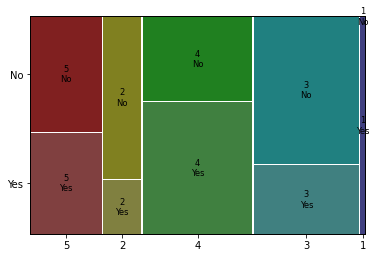

In [26]:

print(mosaic(data, ['RM_productive','RM_better_sleep']))

In [27]:
pd.crosstab(data['RM_productive'],data['RM_quality_time'])

RM_quality_time,No,Yes
RM_productive,,
1,0,3
2,18,6
3,33,33
4,12,57
5,9,36


(<Figure size 432x288 with 3 Axes>, {('5', 'Yes'): (0.0, 0.0, 0.21312872975277067, 0.7973421926910299), ('5', 'No'): (0.0, 0.8006644518272424, 0.21312872975277067, 0.19933554817275742), ('2', 'Yes'): (0.2180306905370844, 0.0, 0.11366865586814434, 0.24916943521594684), ('2', 'No'): (0.2180306905370844, 0.25249169435215946, 0.11366865586814434, 0.7475083056478404), ('4', 'Yes'): (0.33660130718954245, 0.0, 0.326797385620915, 0.8233424815831286), ('4', 'No'): (0.33660130718954245, 0.8266647407193413, 0.326797385620915, 0.17333525928065865), ('3', 'Yes'): (0.6683006535947712, 0.0, 0.31258880363739705, 0.4983388704318937), ('3', 'No'): (0.6683006535947712, 0.5016611295681063, 0.31258880363739705, 0.4983388704318937), ('1', 'Yes'): (0.9857914180164818, 0.0, 0.014208581983518, 0.9966777408637874), ('1', 'No'): (0.9857914180164818, 1.0, 0.014208581983518, 0.0)})


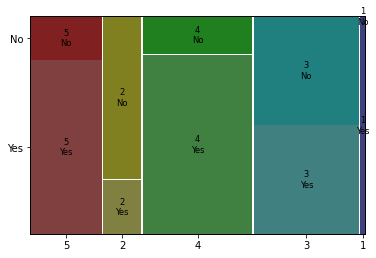

In [28]:
print(mosaic(data, ['RM_productive','RM_quality_time']))

In [29]:
pd.crosstab(data['RM_productive'],data['RM_lazy'])

RM_lazy,1,2,3,4,5
RM_productive,,,,,
1,0,0,0,0,3
2,3,3,3,12,3
3,9,3,24,24,6
4,0,9,21,33,6
5,27,0,12,3,3


(<Figure size 432x288 with 3 Axes>, {('5', '1'): (0.0, 0.0, 0.21312872975277067, 0.5921052631578948), ('5', '2'): (0.0, 0.5953947368421053, 0.21312872975277067, 0.0), ('5', '3'): (0.0, 0.5986842105263159, 0.21312872975277067, 0.2631578947368422), ('5', '4'): (0.0, 0.8651315789473686, 0.21312872975277067, 0.06578947368421052), ('5', '5'): (0.0, 0.9342105263157896, 0.21312872975277067, 0.06578947368421052), ('2', '1'): (0.2180306905370844, 0.0, 0.11366865586814434, 0.12335526315789476), ('2', '2'): (0.2180306905370844, 0.12664473684210528, 0.11366865586814434, 0.12335526315789476), ('2', '3'): (0.2180306905370844, 0.25328947368421056, 0.11366865586814434, 0.12335526315789476), ('2', '4'): (0.2180306905370844, 0.3799342105263159, 0.11366865586814434, 0.49342105263157904), ('2', '5'): (0.2180306905370844, 0.8766447368421053, 0.11366865586814434, 0.12335526315789476), ('4', '1'): (0.33660130718954245, 0.0, 0.326797385620915, 0.0), ('4', '2'): (0.33660130718954245, 0.003289473684210527, 0.32

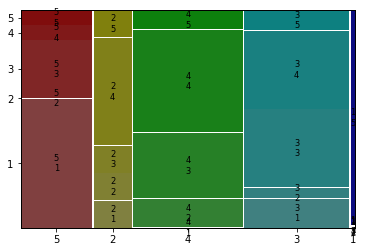

In [30]:
print(mosaic(data, ['RM_productive','RM_lazy']))

In [31]:
pd.crosstab(data['RM_productive'],data['RM_improved_skillset'])

RM_improved_skillset,1,2,3,4,5
RM_productive,,,,,
1,0,3,0,0,0
2,0,3,12,3,6
3,6,9,27,12,12
4,0,0,33,24,12
5,0,3,15,15,12


(<Figure size 432x288 with 3 Axes>, {('5', '5'): (0.0, 0.0, 0.21312872975277067, 0.2631578947368421), ('5', '3'): (0.0, 0.2664473684210526, 0.21312872975277067, 0.3289473684210526), ('5', '2'): (0.0, 0.5986842105263157, 0.21312872975277067, 0.06578947368421051), ('5', '4'): (0.0, 0.6677631578947367, 0.21312872975277067, 0.32894736842105265), ('5', '1'): (0.0, 1.0, 0.21312872975277067, 0.0), ('2', '5'): (0.2180306905370844, 0.0, 0.11366865586814434, 0.24671052631578946), ('2', '3'): (0.2180306905370844, 0.25, 0.11366865586814434, 0.4934210526315789), ('2', '2'): (0.2180306905370844, 0.7467105263157895, 0.11366865586814434, 0.12335526315789473), ('2', '4'): (0.2180306905370844, 0.8733552631578947, 0.11366865586814434, 0.12335526315789473), ('2', '1'): (0.2180306905370844, 1.0, 0.11366865586814434, 0.0), ('4', '5'): (0.33660130718954245, 0.0, 0.326797385620915, 0.17162471395881004), ('4', '3'): (0.33660130718954245, 0.17491418764302058, 0.326797385620915, 0.47196796338672764), ('4', '2'):

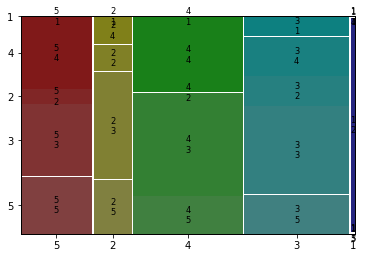

In [32]:
print(mosaic(data, ['RM_productive','RM_improved_skillset']))

In [33]:
pd.crosstab(data['RM_lazy'],data['calmer_stressed'])

calmer_stressed,CALMER,STRESSED
RM_lazy,,
1,18,21
2,9,6
3,33,27
4,21,51
5,0,21


(<Figure size 432x288 with 3 Axes>, {('1', 'CALMER'): (0.0, 0.0, 0.18471156578573458, 0.4600051111679019), ('1', 'STRESSED'): (0.0, 0.4633273703041145, 0.18471156578573458, 0.5366726296958855), ('2', 'CALMER'): (0.18961352657004832, 0.0, 0.07104290991759021, 0.5980066445182723), ('2', 'STRESSED'): (0.18961352657004832, 0.601328903654485, 0.07104290991759021, 0.39867109634551495), ('3', 'CALMER'): (0.26555839727195224, 0.0, 0.2841716396703609, 0.5481727574750831), ('3', 'STRESSED'): (0.26555839727195224, 0.5514950166112956, 0.2841716396703609, 0.44850498338870426), ('4', 'CALMER'): (0.5546319977266269, 0.0, 0.3410059676044331, 0.29069767441860467), ('4', 'STRESSED'): (0.5546319977266269, 0.2940199335548173, 0.3410059676044331, 0.7059800664451826), ('5', 'CALMER'): (0.9005399261153737, 0.0, 0.09946007388462631, 0.0), ('5', 'STRESSED'): (0.9005399261153737, 0.0033222591362126247, 0.09946007388462631, 0.9966777408637874)})


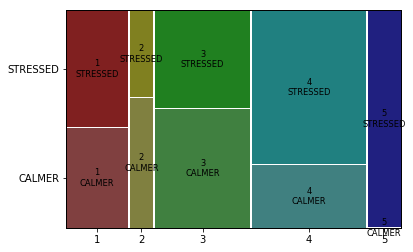

In [34]:
print(mosaic(data, ['RM_lazy','calmer_stressed']))

In [35]:
pd.crosstab(data['RM_productive'],data['RM_save_money'])

RM_save_money,No,Yes
RM_productive,,
1,0,3
2,21,3
3,24,42
4,3,66
5,3,42


(<Figure size 432x288 with 3 Axes>, {('5', 'Yes'): (0.0, 0.0, 0.21312872975277067, 0.9302325581395349), ('5', 'No'): (0.0, 0.9335548172757474, 0.21312872975277067, 0.06644518272425247), ('2', 'Yes'): (0.2180306905370844, 0.0, 0.11366865586814434, 0.12458471760797342), ('2', 'No'): (0.2180306905370844, 0.12790697674418602, 0.11366865586814434, 0.8720930232558138), ('4', 'Yes'): (0.33660130718954245, 0.0, 0.326797385620915, 0.9533439260436226), ('4', 'No'): (0.33660130718954245, 0.9566661851798353, 0.326797385620915, 0.043333814820164636), ('3', 'Yes'): (0.6683006535947712, 0.0, 0.31258880363739705, 0.6342494714587738), ('3', 'No'): (0.6683006535947712, 0.6375717305949863, 0.31258880363739705, 0.36242826940501355), ('1', 'Yes'): (0.9857914180164818, 0.0, 0.014208581983518, 0.9966777408637874), ('1', 'No'): (0.9857914180164818, 1.0, 0.014208581983518, 0.0)})


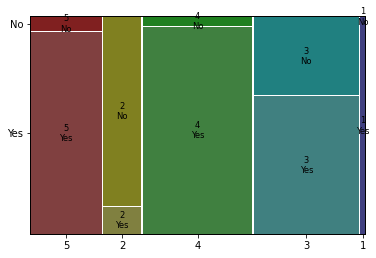

In [36]:
print(mosaic(data, ['RM_productive','RM_save_money']))

Encoding the dataset

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
features = ['Gender','Same_ofiice_home_location','kids','RM_save_money','RM_quality_time','RM_better_sleep','RM_job_opportunities','calmer_stressed']

In [39]:
encode = LabelEncoder()

In [40]:
data[features] = data[features].apply(LabelEncoder().fit_transform)

In [41]:
data.head()

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,Age Group
ID,,,,,,,,,,,,,,,,,,,
1,Bhavana,45,Tutor,0,1,1,1,1,1,0,5,1,5,Yes,5,5,2,1,40-50
2,Harry,24,Tutor,1,0,0,0,0,0,0,2,2,2,No,3,3,0,1,20-30
3,Banditaa,53,HR,0,1,1,1,1,1,0,3,3,4,No,5,3,0,1,50-60
4,Neetha,26,Engineer,0,1,0,1,1,0,1,3,4,4,No,4,5,2,0,20-30
5,Ram,26,Recruiter,1,1,0,0,1,0,1,3,3,5,Yes,4,2,2,1,20-30


In [42]:
data['RM_job_opportunities'].value_counts()

1    87
2    75
0    45
Name: RM_job_opportunities, dtype: int64

ML model 

Implementing logistic regression

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [44]:
data["Occupation"].replace(to_replace=["Engineer","Tutor","Manager","HR","Business","Marketing ","Recruiter"], value=[1,2,3,4,5,6,7],inplace=True)
data['Occupation']

ID
1      2
2      2
3      4
4      1
5      7
      ..
203    1
204    5
205    6
206    6
207    2
Name: Occupation, Length: 207, dtype: int64

In [45]:
x=data.drop(["Name","Target","RM_job_opportunities","digital_connect_sufficient"],axis=1)
y=data['RM_productive']

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [48]:
st_x = StandardScaler()
x_t = st_x.fit_transform(x_train)
x_2 = st_x.transform(x_test)

ValueError: could not convert string to float: '20-30'

In [ ]:
lg=LogisticRegression()

In [ ]:
lg.fit(x_train,y_train)

In [ ]:
y_pred = lg.predict(x_test)

In [ ]:
print("Predicted labels:", y_pred)
print("Actual labels   :", y_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
report = classification_report(y_test, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Classification report:\n", report)